In [1]:
print("Hello World")

Hello World


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
!pip list --version

Package                            Version
---------------------------------- ---------
absl-py                            1.0.0
alabaster                          0.7.11
anaconda-client                    1.7.2
anaconda-navigator                 1.9.2
anaconda-project                   0.8.2
appdirs                            1.4.3
asn1crypto                         0.24.0
astor                              0.8.1
astroid                            2.0.4
astropy                            3.0.4
atomicwrites                       1.2.1
attrs                              18.2.0
Automat                            0.7.0
Babel                              2.6.0
backcall                           0.1.0
backports.shutil-get-terminal-size 1.0.0
beautifulsoup4                     4.6.3
bitarray                           0.8.3
bkcharts                           0.2
blaze                              0.11.3
bleach                             2.1.4
bokeh                              0.13.0
boto   

In [9]:
import numpy as np
import random 
import os 
import cv2

img_size_150p = 128
img_size_224p = 224

path_train = 'datasets/train'
path_test  = 'datasets/test'
categories = ['batu', 'kista', 'normal', 'tumor']
def create_data_img(folder_path):
    imageData = []
    for category in categories:
        path = os.path.join(folder_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
             img_array = cv2.imread(os.path.join(path, img))
             img_convert = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
             img_resize = cv2.resize(img_convert, (img_size_224p, img_size_224p))
             imageData.append([img_resize, class_num])
        return imageData

dataTrain = create_data_img(path_train)
dataTest = create_data_img(path_test)

random.seed(10)
random.shuffle(dataTrain)

In [10]:
X_train, y_train, X_test, y_test = [], [], [], []

for features, label in dataTrain:
  X_train.append(features)
  y_train.append(label)

for features, label in dataTest:
  X_test.append(features) 
  y_test.append(label)


X_train = np.array(X_train).reshape(-1, img_size_224p, img_size_224p, 3)
y_train = np.asarray(y_train)
X_test = np.array(X_test).reshape(-1, img_size_224p, img_size_224p, 3)
y_test = np.asarray(y_test)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)

X_train : (100, 224, 224, 3)
y_train : (100,)
X_test  : (100, 224, 224, 3)
y_test  : (100,)


In [11]:
print("Isi array X_train : \n\n", X_train[0])
print("\nIsi Array X_test : \n\n", X_test[0])

def prep_pixels(train, test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')

  train_norm = train_norm / 255.0
  test_norm = test_norm / 225.0

  return train_norm, test_norm

X_train_norm, X_test_norm = prep_pixels(X_train, X_test)

print("\nIsi Array X_train_norm :\n\n", X_train_norm)
print("\nIsi Array X_test_norm  :\n\n", X_test_norm[0])

Isi array X_train : 

 [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]

Isi Array X_test : 

 [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]

Isi Array X_train_norm :

 [[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0

In [12]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

print("Isi Array y_train :", y_train)
print("Isi Array y_test  :", y_test)

y_train_encode = to_categorical(y_train)
y_test_encode = to_categorical(y_test)

print("\nIsi Array y_train_encode :\n\n", y_train_encode)
print("\nIsi Array y_test_encode :\n\n", y_test_encode)

Isi Array y_train : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Isi Array y_test  : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Isi Array y_train_encode :

 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]


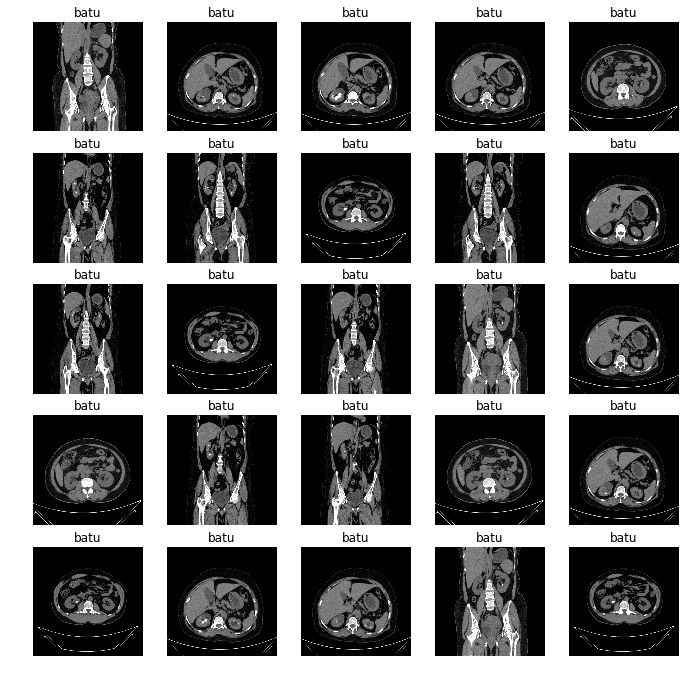

In [13]:
import matplotlib.pyplot as  plt 
%matplotlib inline

nrows = 5
ncols = 5
hspace = 0
wspace = 0
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))
fig.subplots_adjust(hspace, wspace)

for i in range(nrows):
  for j in range(ncols):
    temp = i*ncols+j
    ax[i,j].imshow(X_train[temp])
    if y_train[temp] == 0:
      judul = "batu"
    elif y_train[temp] == 1:
      judul = "kista"
    elif y_train[temp] == 2:
      judul = "normal"
    elif y_train[temp] == 3:
      judul = "tumor"

    ax[i,j].set_title(judul)
    ax[i,j].axis('off')

plt.show()

In [14]:
import gc 

del dataTrain 
del dataTest 
del X_train 
del X_test

gc.collect()

40564

In [15]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import MobileNetV2 

conv_base = MobileNetV2(weights='imagenet', include_top = False, input_shape=(img_size_224p, img_size_224p, 3))
conv_base.trainable = False
conv_base.summary()
plot_model(conv_base, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

9412608/9406464 [==============================] - 29s 3us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________

In [45]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam 

def define_model_mobilenetv2():
  model = Sequential()

  model.add(conv_base)                        
  model.add(GlobalAveragePooling2D())

  model.add(Dense(4, activation='softmax'))

  opt = Adam(lr=0.0003)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

if "model" in globals():
  del model 
  gc.collect()

model = define_model_mobilenetv2()
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=120 )

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_7 ( (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [38]:
os.mkdir("/DATA SEMESTER 7/Model/simpan_model")

In [48]:
%%time
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from keras.utils.np_utils import to_categorical

def evaluate_model(dataX, dataY, n_folds=5):
  epochs = 3
  batch_size = 64

  scores, histories = list(), list()
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  

  i = 0

  for train_ix, val_ix in kfold.split(dataX):
    i = i + 1 
    model = define_model_mobilenetv2()

    trainX, trainY, valX, valY = dataX[train_ix], dataY[train_ix], dataX[val_ix], dataY[val_ix]
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data = (valX, valY), verbose=1)

    loss, acc = model.evaluate(valX, valY, verbose=0)
    print('\nAkurasi Fold ke-' + str(i) + ' = %.3f' % (acc * 100.0))
    print('Loss Fold ke-' + str(i) + ' = %.3f' % (loss) + '\n')
    scores.append(acc)
    histories.append(history)

    model.save("/DATA SEMESTER 7/Model/simpan_model/model_fold_" + str(i) + ".h5")
    model_csv = pd.DataFrame(history.history)
    csv_file = "/DATA SEMESTER 7/Model/simpan_model/model_fold_" + str(i) + ".csv"
    with open(csv_file, mode="w") as f:
      model_csv.to_csv(f)

    del trainX 
    del trainY 
    del valX 
    del valY 
    del model 
    gc.collect
  
  return scores, histories

scores, histories = evaluate_model(X_train_norm, y_train_encode)

Train on 80 samples, validate on 20 samples
Epoch 1/3
80/80 [==============================] - 35s 437ms/sample - loss: 1.6548 - accuracy: 0.1625 - val_loss: 0.6696 - val_accuracy: 0.9500
Epoch 2/3
80/80 [==============================] - 28s 347ms/sample - loss: 1.2148 - accuracy: 0.3875 - val_loss: 0.4352 - val_accuracy: 1.0000
Epoch 3/3
80/80 [==============================] - 28s 353ms/sample - loss: 0.8538 - accuracy: 0.6500 - val_loss: 0.2751 - val_accuracy: 1.0000

Akurasi Fold ke-1 = 100.000
Loss Fold ke-1 = 0.275

Train on 80 samples, validate on 20 samples
Epoch 1/3
80/80 [==============================] - 34s 419ms/sample - loss: 2.5875 - accuracy: 0.0000e+00 - val_loss: 2.4895 - val_accuracy: 0.0000e+00
Epoch 2/3
80/80 [==============================] - 28s 352ms/sample - loss: 2.0350 - accuracy: 0.0375 - val_loss: 1.9917 - val_accuracy: 0.0000e+00
Epoch 3/3
80/80 [==============================] - 29s 369ms/sample - loss: 1.5204 - accuracy: 0.1250 - val_loss: 1.5362 - val_

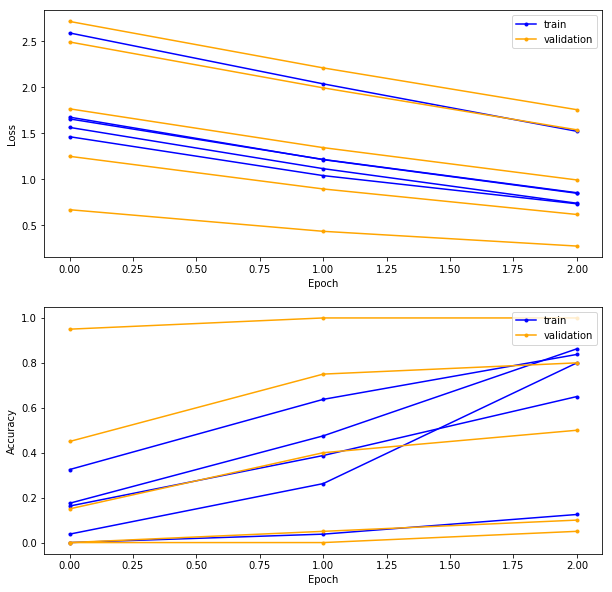

In [49]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_combine(histories):
    plt.figure(figsize=(10,10))
    
    for i in range(len(histories)):
        # plot loss
        plt.subplot(211) # 2 baris, 1 kolom, index ke-1
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')
        
        # plot accuracy
        plt.subplot(212) # 2 baris, 1 kolom, index ke-2
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='bottom right')
    plt.show()

summarize_diagnostics_combine(histories)